## Appliance Energy Usage Data Set

***
### Introduction:
***

This data set was collected from a low-energy consumption household over the course of 4.5 months. Temperature and humidity conditions in and around the house were measured. General weather conditions for that day were recorded from the local weather station. 

**Research Question:**
The purpose for this analysis is to find correlations(if any) between outside conditions and appliance energy usage. That is:


*   Does temperature have any effect on appliance energy usage?
*   Does humidity have any effect on appliance energy usage?
*   Can we fit a model to accurately predict the energy usage of this household?

**Variables:**
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional

**Procedures:**
The analysis will follow these main steps:
- **Step 1**: Load data
- **Step 2**: Perform Exploratory Data Analysis
- **Step 3**: Conclusion





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

#uploading dataset from github
df = pd.read_csv("https://raw.githubusercontent.com/stevensho11/BCS109/master/Final%20Project/energydata_complete.csv")

#checking dimensions of the data
print('The dimensions of the data are: ', df.shape)

#create copy of original data frame
df_copy = df

#show beginning of the data
df.head()

The dimensions of the data are:  (19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [2]:
#check for nulls
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [3]:
#check how many unique values are in each column
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

##Energy Usage of Appliances and lights

A quick pass over the amount of unique values in each column shows that appliances and lights have very little variance in their values compared to the rest of the columns.

##Not Deleting RV1 and RV2

While it seems a good idea to get rid of columns RV1 and RV2 based on what we see on paper, their purpose in the dataset is to test the regression models and to filter out non-predictive attributes. 

In [4]:
#checking the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

##Deleting Date Column

Although the dates in this data set are written as numbers, they are classified as objects(as per df.info) and since date is categorical data, I decided to drop it


In [5]:
df = df.drop(['date'], axis=1)
df_copy = df

#viewing the data again, ensuring there is no more date column
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
#getting summary of the stats and count of any nonnull data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
#for importing pandas_profiling and making a report for my data
!pip install pandas_profiling --upgrade

Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [8]:
#for importing pandas_profiling and making a report for my data
import pandas_profiling
from pandas_profiling import ProfileReport

#Collab experiences a runtime disconnection if the ProfileReport is allowed to run without minimal=True
#This is probably because my dataset is too large, but I did export the HTML to view fully on my browser

profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

#profile = ProfileReport(df, title="Energy Usage of Appliances", html={'style': {'full width': True}})
#profile.to_file(output_file="Energy Usage of Appliances.html")

##Generalisations From Report

The lights column has 15252 instances of zero values. This would indicate a wH consumption of zero. My first assumption here is that they're zero because the lights are off, but to have all of your lights off for well over fifty percent of the time in the span of 4.5 months seems odd. There is one specification on the data that states that the house where all the data was collected is a low-energy household, so that can explain the high amount of zero values. RV1 and RV2 show up as having unique values because again, they are random variables designed to test regression models and filter out non-predictive attributes.



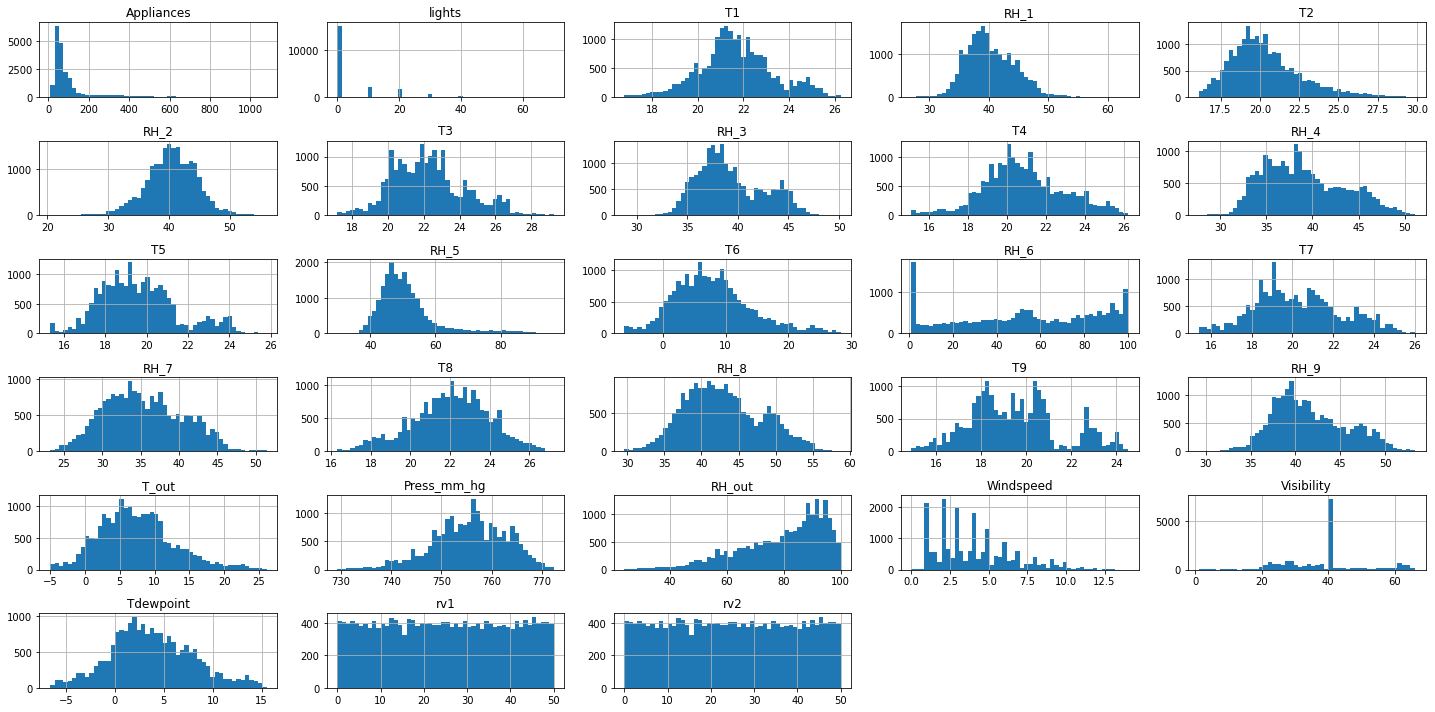

In [9]:
#create histograms from the data
df.hist(bins=50, figsize=(20,10))
#tight layout so the histograms don't overlap with each other
plt.tight_layout()
plt.show()

##Histograms

Discrete features: lights
Windspeed is a bit different from the other continuous data

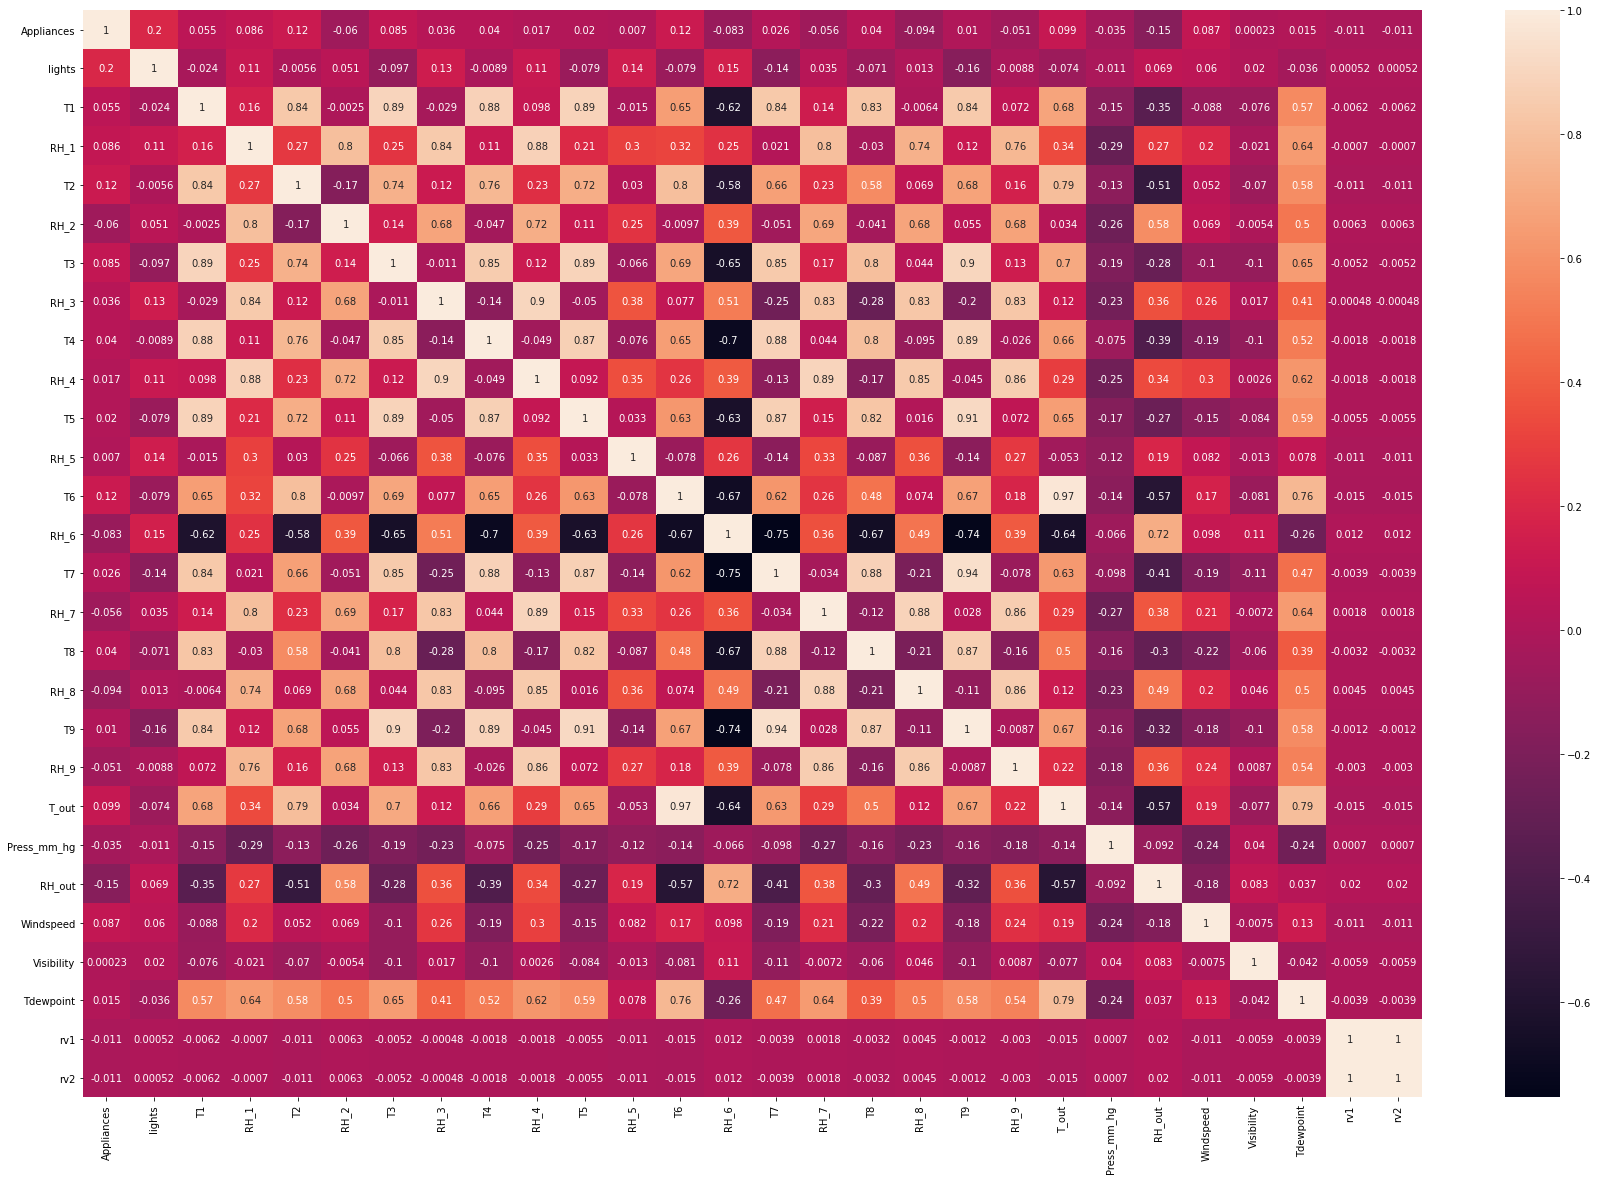

In [10]:
#Using a correlation matrix to analyze relationships in the data
corrMatrix = df.corr()
plt.figure(figsize=(30,20))
#seaborn library is used to create the matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()

##Looking for more specific relationships

RH_6, which is relative humidity outside the building, seems to have strong negative correlations with the rest of the temperature readings inside the building. It also has a non-insignificant relationship with the appliances column as well. 

In [11]:
#checking RH_6 correlation individually
corrMatrix["RH_6"].sort_values(ascending=False)

RH_6           1.000000
RH_out         0.718587
RH_3           0.514912
RH_8           0.489580
RH_4           0.392178
RH_9           0.391943
RH_2           0.389933
RH_7           0.357222
RH_5           0.263797
RH_1           0.245126
lights         0.153756
Visibility     0.108705
Windspeed      0.098317
rv1            0.011671
rv2            0.011671
Press_mm_hg   -0.065814
Appliances    -0.083178
Tdewpoint     -0.260417
T2            -0.580372
T1            -0.615045
T5            -0.632384
T_out         -0.641572
T3            -0.647672
T8            -0.665869
T6            -0.672137
T4            -0.703149
T9            -0.738940
T7            -0.753973
Name: RH_6, dtype: float64

##Temperature Outside and Appliances

Temperature outside(T_out) has the strongest positive correlation with Appliances. I also want to look at this individually in more detail.

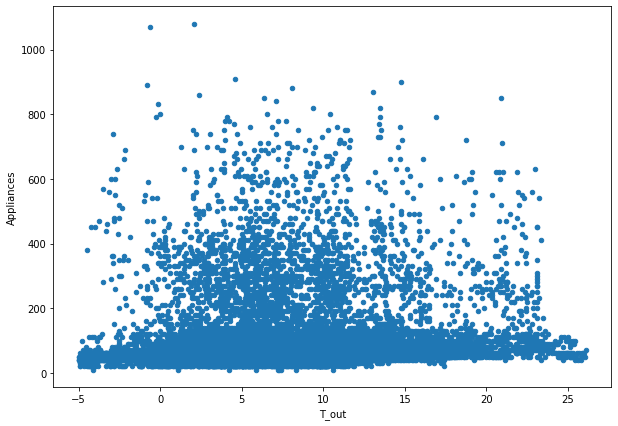

In [12]:
#checking relationship between T_out and Appliances with a scatter plot
df.plot(kind ="scatter", x="T_out", y="Appliances", figsize=(10, 7))

##Sampling Data

The scatterplot above is too crowded. If there was any sort of relationship, it is very obscured. I want to trim some of the excess off by sampling my data

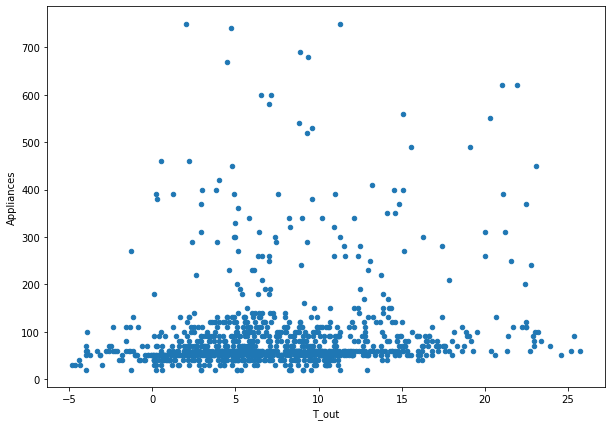

In [18]:
#sample 7000 random lines
df_sample=df.sample(1000)
 
#plot a new scatterplot with the sampled data
df_sample.plot(kind ="scatter", x="T_out", y="Appliances", figsize=(10, 7))


##Assumptions

I'm not so sure if there are any trends to see, but I want to remove any outliers to help clarify.

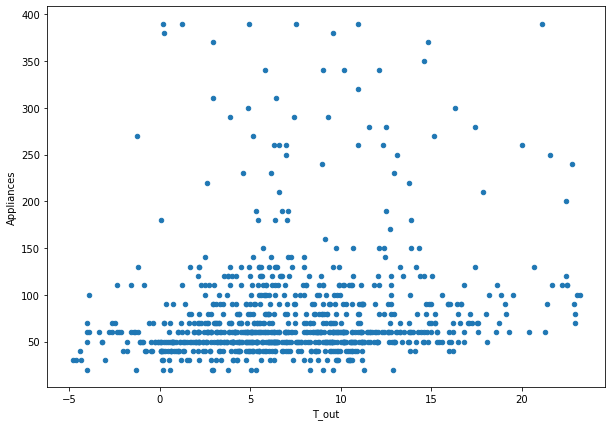

In [19]:
#z-score is a technique that tells you how far a data point is from the mean of the data, or how many standard deviations it is from the population mean
#z-score will be the method I use to detect and remove outliers from my data frame
from scipy import stats

#It is generally accepted to use 3 as the threshold for whether or not you should remove a data point, so I calculate the z-score and remove any points with a z-score of higher than 3 or lower than -3
df_sample=df_sample[(np.abs(stats.zscore(df_sample)) < 3).all(axis=1)]
df_sample.plot(kind ="scatter", x="T_out", y="Appliances", figsize=(10, 7))

##Realizations

Removing outliers from the sampled data reveals a scatterplot where you can almost draw a horizontal line through some of the points. This means that there might not be that strong of a correlation between T_out and Appliances, contrary to what I might have thought beforehand. To make sure this is correct, I want to try this on the original data frame. Before that, I want to see what the scatterplot would look with two variables that actually had a stronger correlation.

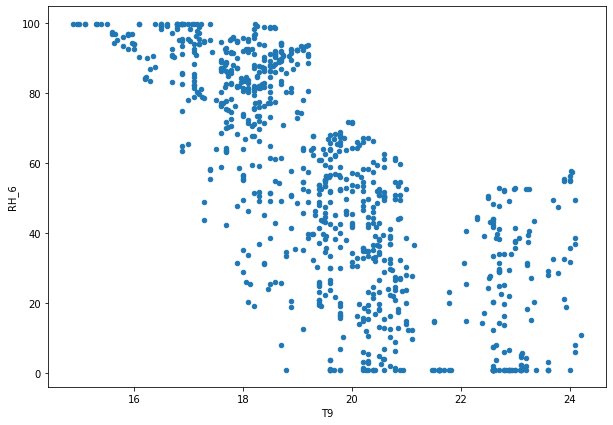

In [20]:
#this scatterplot is showing the relationship between two variables that I already know have a pretty strong negative correlation
df_sample.plot(kind ="scatter", x="T9", y="RH_6", figsize=(10, 7))

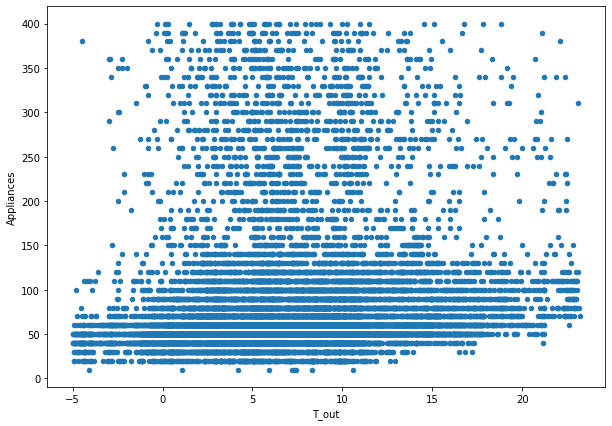

In [16]:
#creating another copy of my original data frame. 
#this copy will not be sampled, but will have gone through the z-score removal of outliers
df_copy_z = df
df_copy_z=df_copy_z[(np.abs(stats.zscore(df_copy_z)) < 3).all(axis=1)]
df_copy_z.plot(kind ="scatter", x="T_out", y="Appliances", figsize=(10, 7))

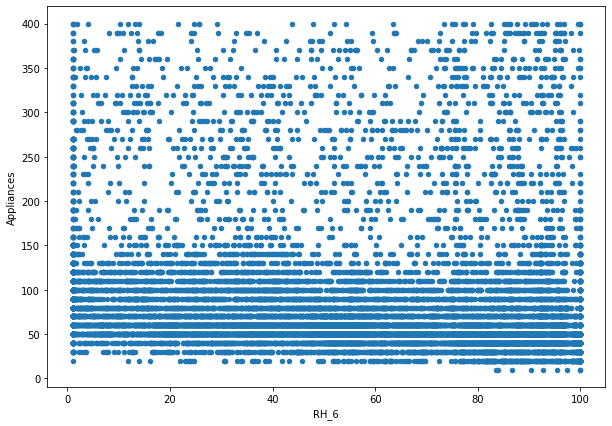

In [17]:
#plotting the relationship between RH_6(relative humidity outside the house) and Appliances energy usage
df_copy_z.plot(kind ="scatter", x="RH_6", y="Appliances", figsize=(10, 7))

##Conclusions Regarding Initial Assumptions

Something like the scatterplot showing the relationship between RH_6 and T9 was what I was looking for between T_out and Appliances; however, the relationship was not there. It seems that in this household, regardless of temperature or humidity, the appliance usage was consistent. It makes sense in the context that this household is a low-energy one, since the people are less inclined to use any sort of appliances to stay comfortable despite the weather. 

There is still one question left to test: is there a way to fit a model to predict the energy usage of Appliances in this household?

In [36]:
#scaling data so that we are on an even playing field

df_reg = df_copy.drop(['lights'], axis=1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_reg)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

df_scaled.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


## Creating a Model


In [37]:
#starting with a linear regression model

from sklearn.linear_model import LinearRegression

#taking out Appliances, because that's what we want to study
y = df_scaled['Appliances'].copy()
x = df_scaled.drop(['Appliances'], axis = 1)

lin_reg = LinearRegression().fit(x, y)
r_sq = lin_reg.score(x, y)

print(r_sq)



0.14644467905316982


## Conclusion from Linear Regression Model

A score of 14% does not give me confidence in accurately predicting the energy use of appliances.

## Regression with Statistics

In [38]:
#using statsmodels.api to view regression results

import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              806.4
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:50:00   Log-Likelihood:                          19816.
No. Observations:               19735   AIC:                                 -3.958e+04
Df Residuals:                   19710   BIC:                                 -3.938e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Evaluating Final Model and Conclusions

The final model gives us an r-squared(centered and uncentered) of 0.506 and 0.505 respectively. It is not the strongest model and more than likely should not be used to predict the energy usage of this household's appliances. 

Among the independent variables, T1, T2, RH_2, T5, RH_7, RH_8, T9, RH_9, T_out, and Tdewpoint were negatively correlated with appliance energy usage. Energy usage was reduced when these variables increased. 

RH_1, T3, RH_3, T4, RH_4, RH_5, T6, RH_6, T7, T8, were notable variables that had a positive correlation with appliance energy use. Energy usage saw an increase when these variables increased.

The strongest correlations with appliance energy use came from RH_1, RH_2, T3, and T6. If you wanted to predict how much energy the household would use at a given time--the temperature and humidity in these rooms would be your best assets.